<a href="https://colab.research.google.com/github/alirezarezaeei78/machine-learning-course/blob/main/Mini_project/Mini_project_1/Miniproject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!Iwget -c https://1mb.informatik.uni-freiburg.de/resources/datasets/ORION/modelnet40 manually_aligned.tar -0 - | tar -xz

In [ ]:
!git clone https://github.com/fxia22/pointnet.pytorch

# Soal1_2

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [ ]:

X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=4, shuffle =True,class_sep= 1, random_state=4)

shift_amount = np.random.randint(len(y))

# Shuffle the data using shift
X_shifted = np.roll(X, shift_amount, axis=0)
y_shifted = np.roll(y, shift_amount)

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Class'] = y

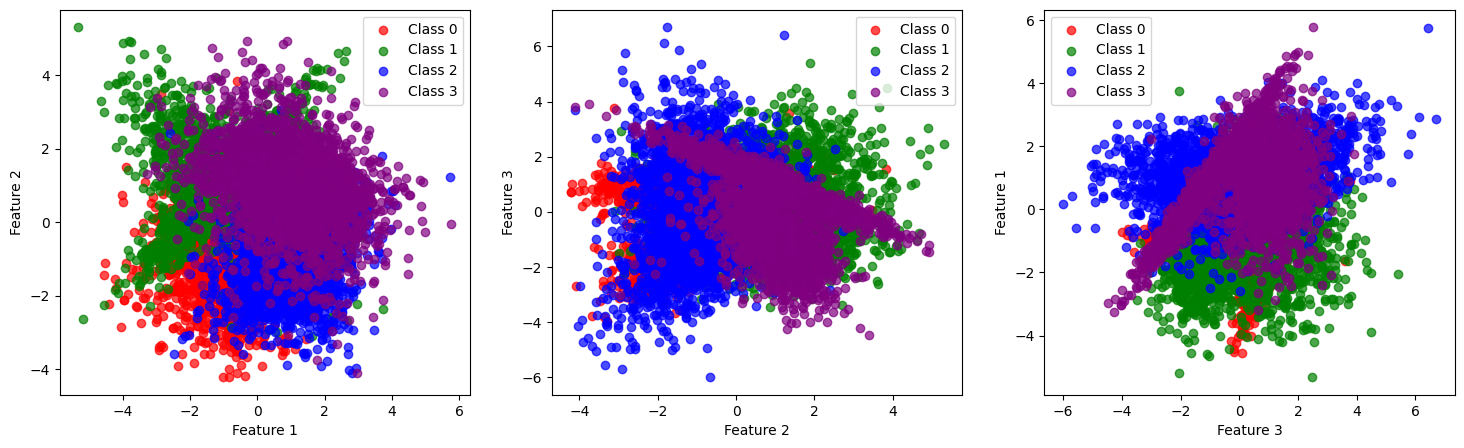

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['red', 'green', 'blue', 'purple']

for i, ax in enumerate(axes):
    for class_value in np.unique(y):
        ix = np.where(y == class_value)
        ax.scatter(X[ix, i % 3], X[ix, (i + 1) % 3], label=f'Class {class_value}', alpha=0.7, color=colors[class_value])
    ax.set_xlabel(f'Feature {i % 3 + 1}')
    ax.set_ylabel(f'Feature {(i + 1) % 3 + 1}')
    ax.legend()

plt.show()


## Soal1_3&4

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report

def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=20, edgecolor='k')

    predictions = model.predict(X)
    misclassified = np.where(predictions != y)
    plt.scatter(X[misclassified, 0], X[misclassified, 1], c="white", s=50, label="Misclassified", edgecolor='k', marker='*')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)




log_reg_2d = LogisticRegression(max_iter=10, C=0.05, solver='liblinear',dual=True ,penalty='l2',tol=1e-4,fit_intercept=True,warm_start= True,multi_class='auto',l1_ratio=None,random_state=4)
log_reg_2d.fit(X_train, y_train)




y_pred = log_reg_2d.predict(X_train)


sgd_clf_2d = SGDClassifier(max_iter=1000, loss='log_loss', alpha=0.01, learning_rate='optimal', random_state=4)
sgd_clf_2d.fit(X_train, y_train)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_decision_boundaries(X_train_2d, y_train, log_reg_2d, "Logistic Regression")

plt.subplot(1, 2, 2)
plot_decision_boundaries(X_train_2d, y_train, sgd_clf_2d, "SGD Classifier (Log Loss)")

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'\nplt.figure(figsize=(14, 6))\n\nplt.subplot(1, 2, 1)\nplot_decision_boundaries(X_train_2d, y_train, log_reg_2d, "Logistic Regression")\n\nplt.subplot(1, 2, 2)\nplot_decision_boundaries(X_train_2d, y_train, sgd_clf_2d, "SGD Classifier (Log Loss)")\n\nplt.show()\n\n'

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming log_reg_2d is your trained LogisticRegression model
log_reg_predictions = log_reg_2d.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Assuming sgd_clf_2d is your trained SGDClassifier model
sgd_clf_predictions = sgd_clf_2d.predict(X_test)
sgd_clf_accuracy = accuracy_score(y_test, sgd_clf_predictions)

print(f"Logistic Regression accuracy: {log_reg_accuracy}")
print(f"SGD Classifier accuracy: {sgd_clf_accuracy}")

# Now using the correct predictions for the logistic regression model
classification_rep_logreg = classification_report(y_test, log_reg_predictions)
print(classification_rep_logreg)


Logistic Regression accuracy: 0.707
SGD Classifier accuracy: 0.7075
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       495
           1       0.64      0.60      0.62       497
           2       0.76      0.75      0.76       510
           3       0.70      0.69      0.70       498

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



## Soal1_5

In [ ]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

# Soal2


## Soal2_2